# [DEV notebook]
Generate dataset using graph representative, then generating similar graphs.

In [9]:
%matplotlib inline
from regain.datasets import kernels
import networkx as nx
import matplotlib.pyplot as plt
from imp import reload
reload(kernels);

/Users/federicot/src/fdtomasi/regain/regain/datasets/kernels.py:561: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  ]
/Users/federicot/miniconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


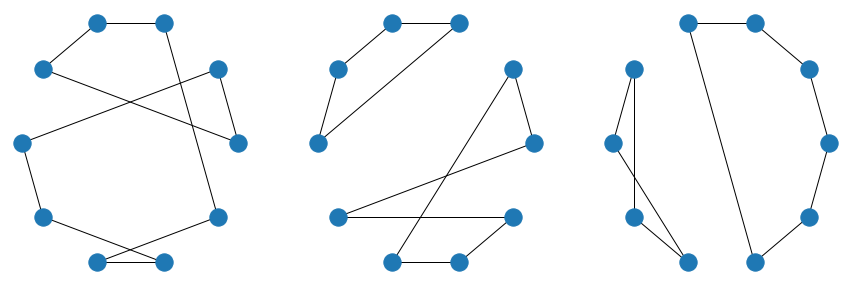

In [10]:
thetas, samples, covs, clusters_reps, pos= kernels.make_cluster_representative(n_obs=10, degree=2, clusters=3, T=15, repetitions=False)

fig, axs = plt.subplots(1,3, figsize=(15,5))
colors = ['red', 'blue', 'green']
for i in range(3):
    nx.draw_circular(clusters_reps[i], ax=axs[i])
#plt.savefig("cluster_representative.png", transparent=True, dpi=200, bbox_inches='tight')

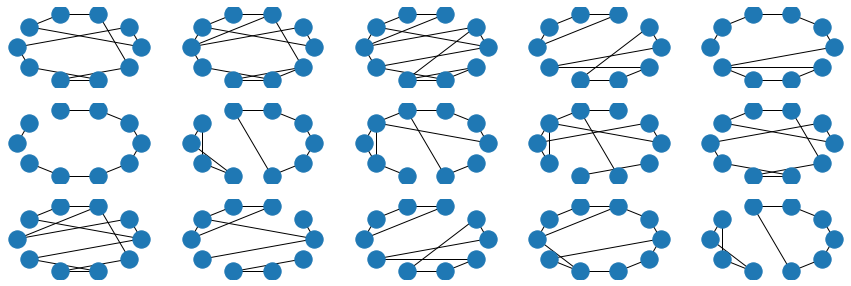

In [13]:
fig, axs = plt.subplots(3,5, figsize=(15,5))
colors = ['red', 'red', 'red', 'blue', 'blue', 'blue']
k = 0
for i in range(3):
    for j in range(5):
        g = nx.from_numpy_array(thetas[k])
        nx.draw_circular(g, ax=axs[i, j])
        k+=1
#plt.savefig("cluster_representative.png", transparent=True, dpi=200, bbox_inches='tight')

/Users/federicot/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/federicot/miniconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


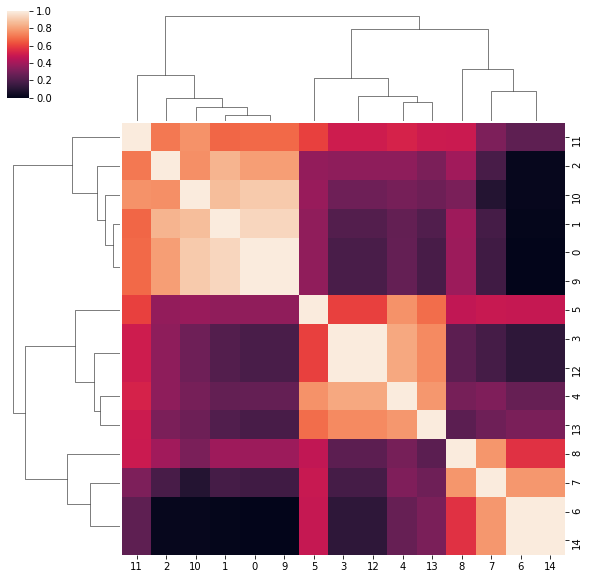

In [15]:
import numpy as np
from regain.norm import l1_norm
import seaborn as sns

distances = np.zeros((15,15))
for i, t in enumerate(thetas):
    for j, t1 in enumerate(thetas):
        distances[i,j] = l1_norm(t-t1)

distances /= np.max(distances)

sns.clustermap(1-distances)

samples = np.array(samples)

X = np.vstack(samples)
y = np.repeat(np.arange(samples.shape[0]), samples.shape[1])